In [71]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

In [72]:
import urllib.request
import os

In [73]:
def clean_files(target_directory, target_file):
    if os.path.exists(target_directory):
        if os.path.exists(f"{target_directory}/{target_file}"):
            os.remove(f"{target_directory}/{target_file}")
        os.rmdir(target_directory)

    if os.path.exists(target_file):
        os.remove(target_file)

def fetch_file(url, target_directory, target_file):
    os.mkdir(target_directory)
    urllib.request.urlretrieve(url, f"{target_directory}/{target_file}")

url = "https://opendata-ajuntament.barcelona.cat/data/dataset/3a0934e4-cdba-4056-950a-331429cb8908/resource/da151a88-9dbe-4715-9ebd-9982506deb85/download/2018_padro_nacionalitat_per_sexe.csv"
target_directory = 'this-is-the-one'
target_file = '2018_padro_nacionalitat_per_sexe.csv'
clean_files(target_directory, target_file)
fetch_file(url, target_directory, target_file)


In [74]:
os.listdir(target_directory)


['2018_padro_nacionalitat_per_sexe.csv']

# Problem 2: Plotting in R

In [5]:
%%R

library(tidyverse)
library(utils)


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [6]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'
target_file <- 'this-is-the-one/2018_padro_nacionalitat_per_sexe.csv'

barris <- read_csv(target_file)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_double()
)

  warnings.warn(x, RRuntimeWarning)


In [7]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# A tibble: 7,446 x 8
     Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
   <dbl>          <dbl> <chr>              <dbl> <fct>     <fct> <fct>       
 1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
 2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
 3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
 4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
 5  2018              2 Eixample               5 el Fort … Home  Espanya     
 6  2018              2 Eixample               6 la Sagra… Home  Espanya     
 7  2018              2 Eixample               7 la Dreta… Home  Espanya     
 8  2018              2 Eixample               8 l'Antiga… Home  Espanya     
 9  2018              2 Eixample               9 la Nova … Home  Espanya     
10  2018              2 Eixample              10 Sant Ant… Home  Espanya     
# … with 7,436 more rows, and 1 more varia

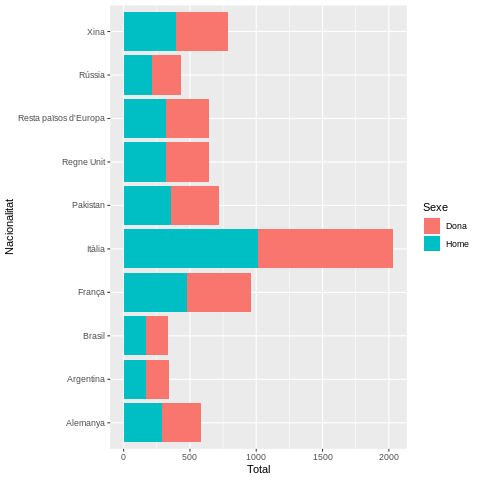

In [76]:
%%R

# Option 1 : cutoff using a number of countries, e.g. top 20:
cutoff <- 20

cutoff_1 <- barris %>%
    filter(Nom_Barri == "el Poblenou") %>%
    filter(Nacionalitat != 'Espanya') %>%
    group_by(Nacionalitat) %>%
    mutate(Total = sum(Nombre)) %>%
    ungroup %>%
    arrange(desc(Total)) %>%
    head(cutoff)

ggplot() + geom_col(data=cutoff_1, 
                aes(x=Nacionalitat, y=Total, fill=Sexe)) +
    coord_flip()


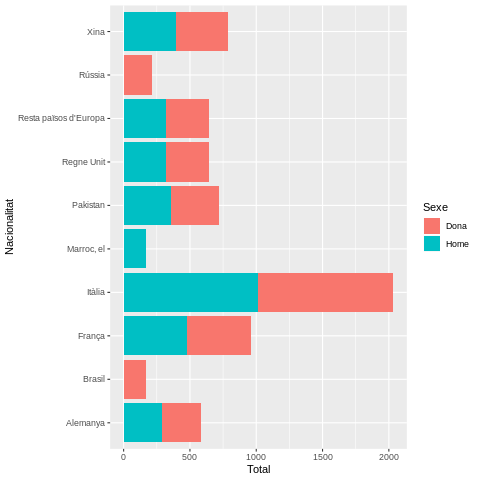

In [77]:
%%R

# Option 1 : cutoff using number of residents
cutoff <- 100

cutoff_2 <- barris %>%
    filter(Nom_Barri == "el Poblenou") %>%
    filter(Nacionalitat != 'Espanya') %>%
    group_by(Nacionalitat) %>%
    mutate(Total = sum(Nombre)) %>%
    ungroup %>%
    arrange(desc(Total)) %>%
    filter(Nombre >= cutoff)

ggplot() + geom_col(data=cutoff_2, 
                aes(x=Nacionalitat, y=Total, fill=Sexe)) +
    coord_flip()

# Problem 3: Classes in Python

In [ ]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

In [62]:
class RandomClassifier():
    def __init__(self, probability):
        self.probability = probability
    
    def predict(self, x):
        if np.random.uniform() <= self.probability:
            return 1
        else:
            return 0

In [63]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

A pure function is one where the only thing that determines the return value is the input values - _i.e._ it does not depend on other external values. This is similar to the way that functions work in maths. It is good because the function will be entirely deterministic.

### What is lazy evaluation and when might you use it? (2-3 lines)

Lazy evaluation is a process when you defer evaluating things until they are needed by other compuations. It is useful as it avoids repeated evaluations.